*PARCIAL 1 VISION ARTIFICIAL- CONTEO DE TORNILLOS (SEBASTIAN- ORLANDO)*

*CARGA Y CONFIGURACION DE IMAGEN*

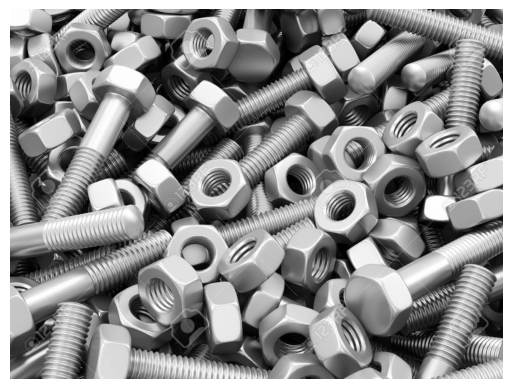

In [4]:
import cv2  
import numpy as np 
from matplotlib import pyplot as plt

# Leer la imagen original (RGB)
# Convertir a escala de grises
img1 = cv2.imread('imagenes/img1.jpg')
img1_gray = cv2.cvtColor(img1, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen con matplotlib
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()



*TAMAÑO Y TIPO DE IMAGENES*

In [5]:
print("Forma de la imagen original:", img1.shape)
print("Forma de la imagen en escala de grises:", img1_gray.shape)


Forma de la imagen original: (975, 1300, 3)
Forma de la imagen en escala de grises: (975, 1300, 4)


*CONVERSION DE IMAGEN A DISTINTAS ESCALAS*

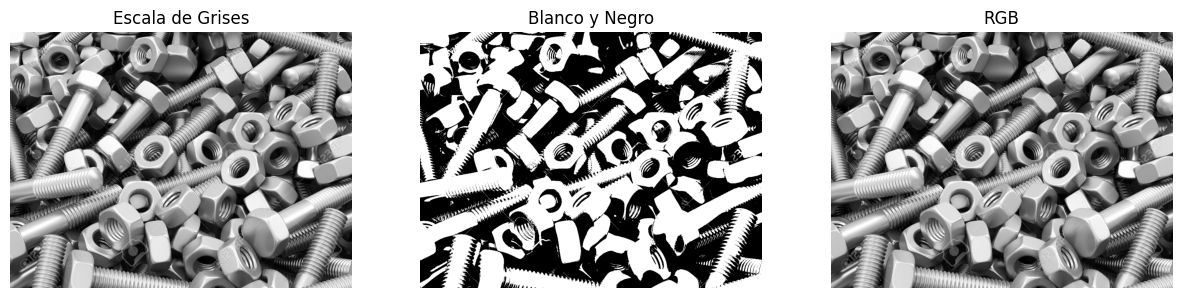

In [6]:
# UMBRAL DEFINIDO A 127 COMO STANDART
_,img1_binary = cv2.threshold(img1_gray,127,255, cv2.THRESH_BINARY)

# Mostrar las imágenes utilizando matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Escala de grises
axes[0].imshow(img1_gray, cmap='gray')
axes[0].set_title("Escala de Grises")
axes[0].axis('off')

# Blanco y negro (binaria)
axes[1].imshow(img1_binary, cmap='gray')
axes[1].set_title("Blanco y Negro")
axes[1].axis('off')

# Imagen RGB
axes[2].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[2].set_title("RGB")
axes[2].axis('off')

plt.show()


Conversión a imagen binaria (umbral fijo).



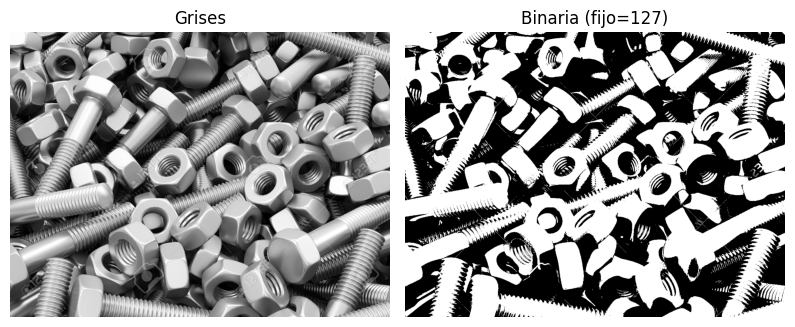

In [7]:
TH = 127 

# Umbral fijo normal (si los tornillos son más claros que el fondo)
_, bin_fijo = cv2.threshold(img1_gray, TH, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img1_gray, cmap='gray'); plt.title('Grises'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(bin_fijo, cmap='gray'); plt.title(f'Binaria (fijo={TH})'); plt.axis('off')
plt.tight_layout(); plt.show()

Binarización con umbral adaptativo.


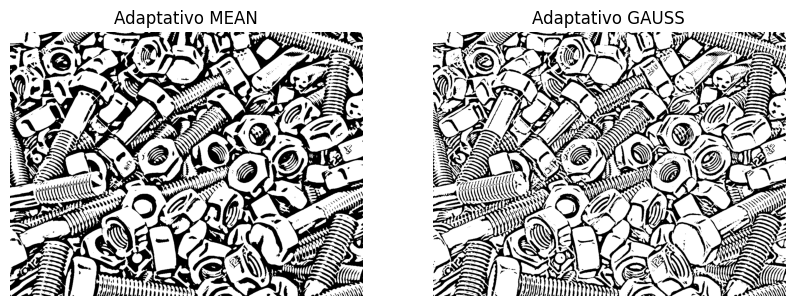

In [8]:
# Convertir correctamente a escala de grises
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado
gray_blur = cv2.GaussianBlur(img1_gray, (5,5), 0)

# Parámetros de la binarización adaptativa
blockSize = 31  # impar >= 3
C = 5           # constante

# Umbral adaptativo
bin_adapt_mean = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

bin_adapt_gauss = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, blockSize, C
)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(bin_adapt_mean, cmap='gray'); plt.title('Adaptativo MEAN'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(bin_adapt_gauss, cmap='gray'); plt.title('Adaptativo GAUSS'); plt.axis('off')
plt.show()


# APLICANDO OPERACIONES LOGICAS #

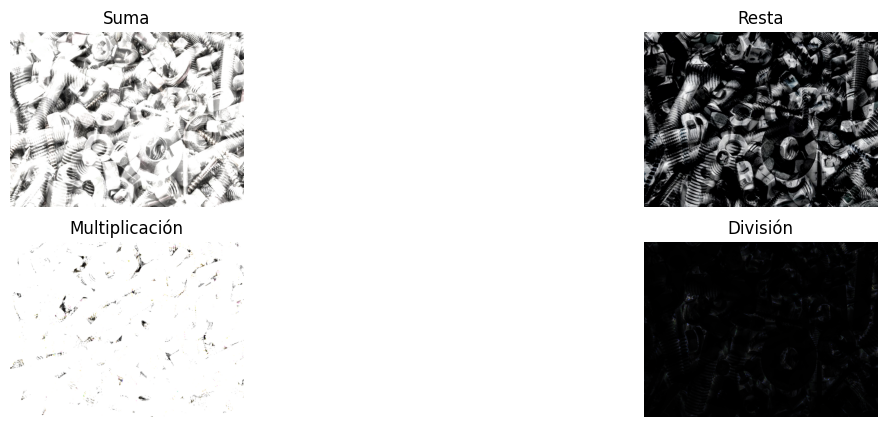

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar dos imágenes (deben tener el mismo tamaño)
img1 = cv2.imread('imagenes/img1.jpg')
img2 = cv2.imread('imagenes/img2.jpg')

if img1 is None or img2 is None:
    raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar. Verifica las rutas.")

# Redimensionar img2 si es necesario
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Suma de imágenes
sum_img = cv2.add(img1, img2)

# Resta de imágenes
diff_img = cv2.subtract(img1, img2)

# Multiplicación de imágenes
mult_img = cv2.multiply(img1, img2)

# División de imágenes
div_img = cv2.divide(img1, img2)

# Convertir imágenes a RGB para matplotlib
sum_img = cv2.cvtColor(sum_img, cv2.COLOR_BGR2RGB)
diff_img = cv2.cvtColor(diff_img, cv2.COLOR_BGR2RGB)
mult_img = cv2.cvtColor(mult_img, cv2.COLOR_BGR2RGB)
div_img = cv2.cvtColor(div_img, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes resultantes
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0][0].imshow(sum_img)
axes[0][0].set_title("Suma")
axes[0][0].axis('off')

axes[0][1].imshow(diff_img)
axes[0][1].set_title("Resta")
axes[0][1].axis('off')

axes[1][0].imshow(mult_img)
axes[1][0].set_title("Multiplicación")
axes[1][0].axis('off')

axes[1][1].imshow(div_img)
axes[1][1].set_title("División")
axes[1][1].axis('off')

plt.show()

# Operacione Morfologicas a consideracion #

Áreas de los objetos detectados: [81.0, 1513.5, 36.0, 114.5, 158.5, 246.5, 48.0, 36.0, 36.0, 46529.0, 705.0, 85.5, 24644.0, 65.0, 156.0, 396.5, 636.0, 134.0, 26212.5, 3357.5, 6359.0, 54.0, 48.5, 892.5, 4159.0, 66.0, 255.5, 456.5, 36.0, 3297.5, 107.0, 31.5, 327724.5, 83.5, 37937.5, 165.0, 19671.0, 127205.0, 7677.5, 18564.5]
Perímetros de los objetos detectados: [35.65685415267944, 269.80612897872925, 24.0, 45.071067690849304, 53.071067690849304, 64.72792184352875, 28.0, 24.0, 24.0, 2401.2590087652206, 124.28427076339722, 39.071067690849304, 1559.64674949646, 31.656854152679443, 48.485281229019165, 121.98275470733643, 184.9116872549057, 50.485281229019165, 1301.3696193695068, 257.2964633703232, 363.6467499732971, 28.82842707633972, 27.41421353816986, 132.87005722522736, 320.9949474334717, 32.82842707633972, 74.72792184352875, 110.04162991046906, 24.0, 225.17871236801147, 41.65685415267944, 22.242640495300293, 12682.442566394806, 36.24264061450958, 2042.6042400598526, 58.485281229019165, 

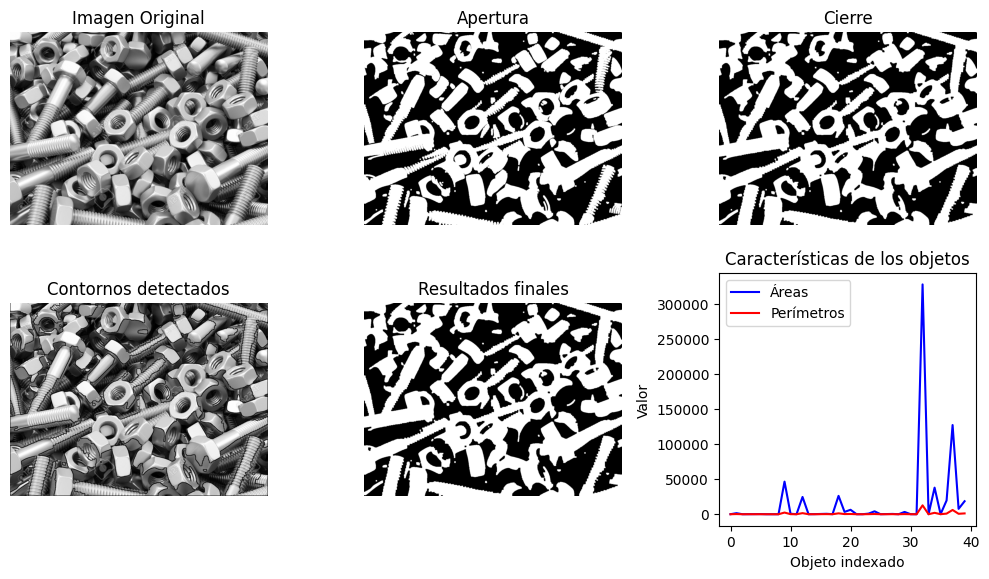

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen médica (en escala de grises)
image = cv2.imread('imagenes/img1.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Preprocesamiento: convertir la imagen a binaria usando umbralización
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Crear un kernel para las operaciones morfológicas
kernel = np.ones((7, 7), np.uint8)

# Operaciones morfológicas
# Apertura: elimina el ruido (elimina pequeñas manchas en el fondo)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Cierre: llena los agujeros dentro de los objetos (en este caso, podría ser útil para objetos como tumores o células)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Mostrar las imágenes después de las operaciones morfológicas
plt.subplot(2, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Apertura')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Cierre')
plt.axis('off')

# Detener el procesamiento si la imagen ya está limpia

# Detección de contornos para obtener los objetos segmentados
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original para visualización
contour_image = cv2.drawContours(np.copy(image), contours, -1, (0, 255, 0), 2)

# Mostrar los contornos
plt.subplot(2, 3, 4)
plt.imshow(contour_image, cmap='gray')
plt.title('Contornos detectados')
plt.axis('off')

# Extraer características geométricas: área y perímetro
areas = []
perimeters = []
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)  # 'True' porque es un contorno cerrado
    areas.append(area)
    perimeters.append(perimeter)

# Mostrar estadísticas
print("Áreas de los objetos detectados:", areas)
print("Perímetros de los objetos detectados:", perimeters)

# Mostrar los valores de área y perímetro en el documento
plt.subplot(2, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title('Resultados finales')
plt.axis('off')

# Mostrar la gráfica con los valores de área y perímetro
plt.subplot(2, 3, 6)
plt.plot(areas, label="Áreas", color="blue")
plt.plot(perimeters, label="Perímetros", color="red")
plt.legend()
plt.title('Características de los objetos')
plt.xlabel('Objeto indexado')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()